In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

#inpath =  'C:/Users/Diego Torres/OneDrive - Universidad de los Andes/Trabajos/Machine Learning/Reclutamiento_&_Seleccion_CarlosPando/Bases/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Base_modelos.xlsx',
                        index_col=0)
dataset.head(6)

,gender,education_level,major_discipline,recommended,applied_before,Vacant,disability,offered,experience,disab_lvl,Target
enrollee_id,,,,,,,,,,,
1,1,High School,Unknown,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica,0
2,1,Phd,STEM,0,0,Operario/a,0,0,1-2,No aplica,0
4,1,Masters,STEM,0,1,Gerente Asistente de Planta de Incubación,0,0,1-2,No aplica,0
5,1,Masters,STEM,0,1,Coordinador de Contabilidad y Administración,0,0,<1,No aplica,0
7,1,Masters,STEM,1,1,Gerente Asistente de Planta de Incubación,0,0,<1,No aplica,0
8,0,Graduate,Humanities,0,0,Operario/a,0,0,2-5,No aplica,0


In [ ]:
dataset.shape
dataset.columns

Index(['gender', 'education_level', 'major_discipline', 'recommended',
       'applied_before', 'Vacant', 'disability', 'offered', 'experience',
       'disab_lvl', 'Target'],
      dtype='object')

In [ ]:
# X = dataset.drop('Vacant', axis =1)
# X


In [ ]:

X = dataset.iloc[:, 0:10].values #.values convierte el df a array
#X = X.iloc[:, 0:10].values #.values convierte el df a array
X

array([['1', 'High School', 'Unknown', ..., 0, '1-2', 'No aplica'],
       ['1', 'Phd', 'STEM', ..., 0, '1-2', 'No aplica'],
       ['1', 'Masters', 'STEM', ..., 0, '1-2', 'No aplica'],
       ...,
       ['1', 'Graduate', 'Other', ..., 0, '2-5', 'No aplica'],
       ['1', 'Graduate', 'STEM', ..., 0, '<1', 'No aplica'],
       ['1', 'Graduate', 'STEM', ..., 0, '2-5', 'No aplica']],
      dtype=object)

In [ ]:
y = dataset.iloc[:, 10].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder


labelencoder_X0 = LabelEncoder()
X[:,0] = labelencoder_X0.fit_transform(X[:,0])
X_ = pd.DataFrame(X)
X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,High School,Unknown,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica
1,1,Phd,STEM,0,0,Operario/a,0,0,1-2,No aplica
2,1,Masters,STEM,0,1,Gerente Asistente de Planta de Incubación,0,0,1-2,No aplica
3,1,Masters,STEM,0,1,Coordinador de Contabilidad y Administración,0,0,<1,No aplica
4,1,Masters,STEM,1,1,Gerente Asistente de Planta de Incubación,0,0,<1,No aplica
5,0,Graduate,Humanities,0,0,Operario/a,0,0,2-5,No aplica
6,1,Graduate,STEM,0,0,Operario/a,0,0,2-5,No aplica
7,0,Graduate,STEM,0,0,Gerente de Planta de Incubacion,1,0,>5,medio
8,1,Primary School,Unknown,0,1,Operario/a,0,0,2-5,No aplica
9,1,Graduate,STEM,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica


In [ ]:
labelencoder_X1 = LabelEncoder()
X[:,1] = labelencoder_X1.fit_transform(X[:,1])
X_ = pd.DataFrame(X)
X_.head(10)


,0,1,2,3,4,5,6,7,8,9
0,1,1,Unknown,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica
1,1,3,STEM,0,0,Operario/a,0,0,1-2,No aplica
2,1,2,STEM,0,1,Gerente Asistente de Planta de Incubación,0,0,1-2,No aplica
3,1,2,STEM,0,1,Coordinador de Contabilidad y Administración,0,0,<1,No aplica
4,1,2,STEM,1,1,Gerente Asistente de Planta de Incubación,0,0,<1,No aplica
5,0,0,Humanities,0,0,Operario/a,0,0,2-5,No aplica
6,1,0,STEM,0,0,Operario/a,0,0,2-5,No aplica
7,0,0,STEM,0,0,Gerente de Planta de Incubacion,1,0,>5,medio
8,1,4,Unknown,0,1,Operario/a,0,0,2-5,No aplica
9,1,0,STEM,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica


In [ ]:
labelencoder_X2 = LabelEncoder()
X[:,2] = labelencoder_X2.fit_transform(X[:,2])
X_ = pd.DataFrame(X)
X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,1,6,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica
1,1,3,5,0,0,Operario/a,0,0,1-2,No aplica
2,1,2,5,0,1,Gerente Asistente de Planta de Incubación,0,0,1-2,No aplica
3,1,2,5,0,1,Coordinador de Contabilidad y Administración,0,0,<1,No aplica
4,1,2,5,1,1,Gerente Asistente de Planta de Incubación,0,0,<1,No aplica
5,0,0,2,0,0,Operario/a,0,0,2-5,No aplica
6,1,0,5,0,0,Operario/a,0,0,2-5,No aplica
7,0,0,5,0,0,Gerente de Planta de Incubacion,1,0,>5,medio
8,1,4,6,0,1,Operario/a,0,0,2-5,No aplica
9,1,0,5,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica


In [ ]:
labelencoder_X5 = LabelEncoder()
X[:,5] = labelencoder_X5.fit_transform(X[:,5])
X_ = pd.DataFrame(X)
X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,1,6,0,0,5,0,0,1-2,No aplica
1,1,3,5,0,0,14,0,0,1-2,No aplica
2,1,2,5,0,1,9,0,0,1-2,No aplica
3,1,2,5,0,1,5,0,0,<1,No aplica
4,1,2,5,1,1,9,0,0,<1,No aplica
5,0,0,2,0,0,14,0,0,2-5,No aplica
6,1,0,5,0,0,14,0,0,2-5,No aplica
7,0,0,5,0,0,12,1,0,>5,medio
8,1,4,6,0,1,14,0,0,2-5,No aplica
9,1,0,5,0,0,5,0,0,1-2,No aplica


In [ ]:
labelencoder_X8 = LabelEncoder()
X[:,8] = labelencoder_X8.fit_transform(X[:,8])
X_ = pd.DataFrame(X)
X_.head(10)


# labelencoder_X7 = LabelEncoder()
# X[:,7] = labelencoder_X7.fit_transform(X[:,7])
# X_ = pd.DataFrame(X)
# X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,1,6,0,0,5,0,0,0,No aplica
1,1,3,5,0,0,14,0,0,0,No aplica
2,1,2,5,0,1,9,0,0,0,No aplica
3,1,2,5,0,1,5,0,0,2,No aplica
4,1,2,5,1,1,9,0,0,2,No aplica
5,0,0,2,0,0,14,0,0,1,No aplica
6,1,0,5,0,0,14,0,0,1,No aplica
7,0,0,5,0,0,12,1,0,3,medio
8,1,4,6,0,1,14,0,0,1,No aplica
9,1,0,5,0,0,5,0,0,0,No aplica


In [ ]:
labelencoder_X9 = LabelEncoder()
X[:,9] = labelencoder_X9.fit_transform(X[:,9])
X_ = pd.DataFrame(X)
X_.head(10)

# labelencoder_X8 = LabelEncoder()
# X[:,8] = labelencoder_X8.fit_transform(X[:,8])
# X_ = pd.DataFrame(X)
# X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,1,6,0,0,5,0,0,0,0
1,1,3,5,0,0,14,0,0,0,0
2,1,2,5,0,1,9,0,0,0,0
3,1,2,5,0,1,5,0,0,2,0
4,1,2,5,1,1,9,0,0,2,0
5,0,0,2,0,0,14,0,0,1,0
6,1,0,5,0,0,14,0,0,1,0
7,0,0,5,0,0,12,1,0,3,2
8,1,4,6,0,1,14,0,0,1,0
9,1,0,5,0,0,5,0,0,0,0


In [ ]:
X.shape

(19158, 10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 421)
print(f'''% Positive class in Train = {np.round(pd.DataFrame(y_train).value_counts(normalize=True)[1]*100,2)}
      % Positive class in Test = {np.round(pd.DataFrame(y_train).value_counts(normalize=True)[1]*100,2)}''')
# X_train

In [ ]:
sX = StandardScaler()
X_train = sX.fit_transform(X_train)
X_test = sX.transform(X_test)
X_train_df = pd.DataFrame(X_train)
X_train_df

In [ ]:
#compile??

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

import seaborn 
import matplotlib.pyplot as plt

def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total career swith = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model.predict(X_train), y_train)))
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
    g2.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
    g3.set_ylabel('Total career swith = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score Totalset: {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)

def Featureimportances(models):
    model = models
    model.fit(X_train1,y_train1)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import seaborn as sns

# Train
model = RandomForestClassifier(random_state=421)
model.fit(X_train, y_train)
preds = model.predict(X_test)


# Evaluate
print(f'Accuracy = {accuracy_score(y_test,preds):.2f}\nRecall = {recall_score(y_test,preds):.4f}\n')
cm = confusion_matrix(y_test, preds)
# plt.figure(figsize=(8,6))
# plt.title('Matriz confusion', size = 16)
# sns.heatmap(cm, annot = True, cmap='gnuplot');
plot_confusion_matrix(cm, ['No pasa el filtro','Pasa el filtro'],title='Matriz de confusión')

Accuracy = 1.00
Recall = 0.9765



NameError: ignored

Accuracy = 0.98278
Recall = 0.8638



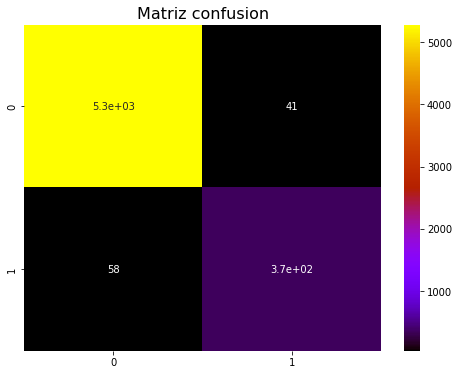

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train
model = LogisticRegression(random_state=421)
model.fit(X_train, y_train)
preds = model.predict(X_test)


# Evaluate
print(f'Accuracy = {accuracy_score(y_test,preds):.5f}\nRecall = {recall_score(y_test,preds):.4f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8,6))
plt.title('Matriz confusion', size = 16)
sns.heatmap(cm, annot = True, cmap='gnuplot');

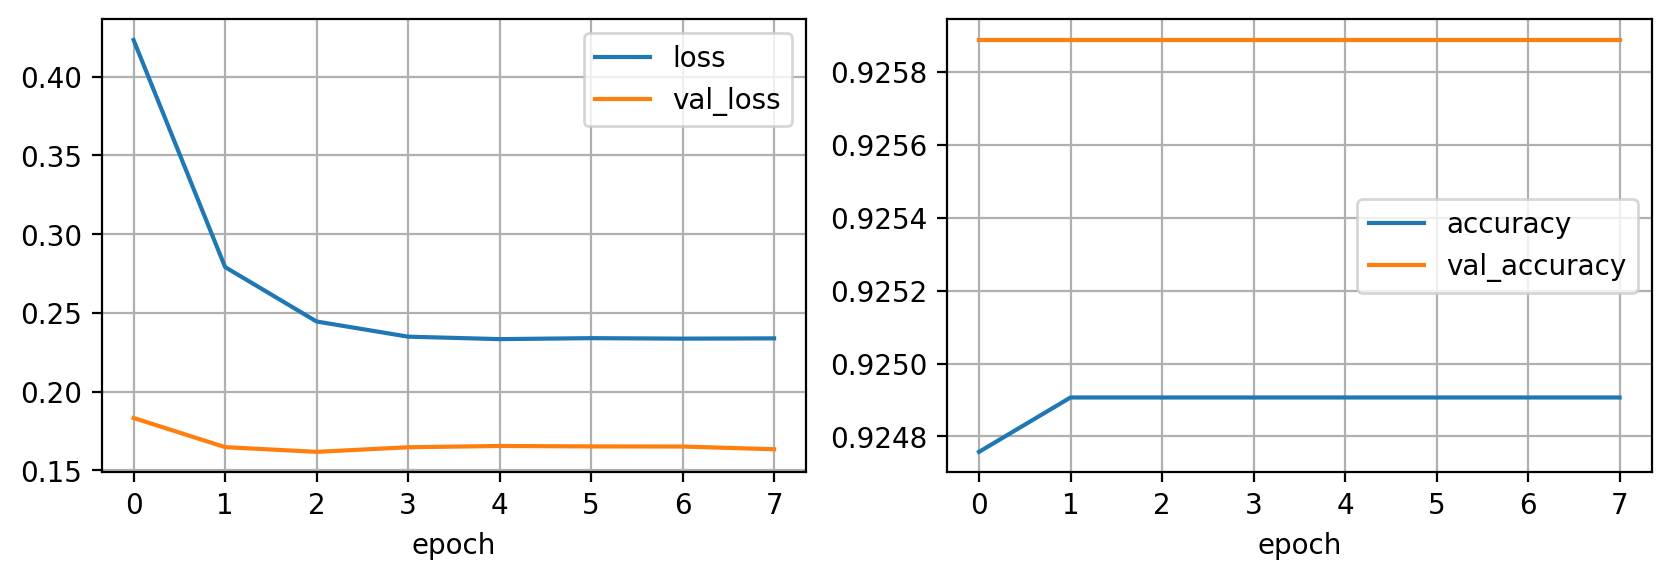

In [ ]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#predecir
y_pred = clf.predict(X_test)
y_pred

180/180 [==============================] - 0s 1ms/step


array([[0.11167916],
       [0.0236388 ],
       [0.00737633],
       ...,
       [0.00030667],
       [0.02593457],
       [0.02867566]], dtype=float32)

In [ ]:
y_pred = (y_pred>0.1)
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print((cm[0][0]+cm[1][1])/cm.sum())

0.982080723729993


Confusion matrix, without normalization
[[5219  103]
 [   0  426]]


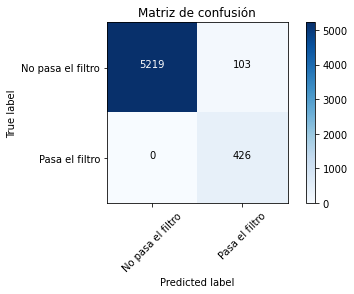

In [ ]:
plot_confusion_matrix(cm, ['No pasa el filtro','Pasa el filtro'],title='Matriz de confusión')